
<h1> People Analytics - Previsão de desligamentos em uma empresa de TI </h1>
  
    
     
<h3> <br/ >O projeto consiste em analisar e explorar dados de funcionários de uma empresa de TI e posteriormente classificar a retenção ou turnover dos colaboradores.<br/> <br/>O dataset utilizado possui 30 atributos (variáveis) dos respectivos funcionários.  


In [388]:
#Iimportando os pacotes
library(caret)
library(ggplot2)
library(data.table)
library(car)
library(caTools)
library(rpart)


In [330]:
# Carregando a base de dados
dados_rh = read.csv("dataset.csv")

In [331]:
head(dados_rh)

Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee.Source,AgeStartedWorking
41,Voluntary Resignation,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,0,8,0,1,6,4,0,5,Referral,33
37,Voluntary Resignation,Travel_Rarely,Human Resources,6,4,Human Resources,1,Female,3,...,0,8,0,1,6,4,0,5,Referral,29
41,Voluntary Resignation,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,0,8,0,1,6,4,0,5,Referral,33
37,Voluntary Resignation,Travel_Rarely,Human Resources,6,4,Marketing,1,Female,3,...,0,8,0,1,6,4,0,5,Referral,29
37,Voluntary Resignation,Travel_Rarely,Human Resources,6,4,Human Resources,1,Female,3,...,0,8,0,1,6,4,0,5,Referral,29
37,Voluntary Resignation,Travel_Rarely,Human Resources,6,4,Marketing,1,Female,3,...,0,8,0,1,6,4,0,5,Referral,29


In [332]:
# Contagem de registros
count(dados_rh)

n
23058


In [333]:
# Transformando variáveis categóricas para o tipo fator
dados_rh$Attrition = as.factor(dados_rh$Attrition)
dados_rh$BusinessTravel = as.factor(dados_rh$BusinessTravel)
dados_rh$Department = as.factor(dados_rh$Department)
dados_rh$Education = as.factor(dados_rh$Education)
dados_rh$EducationField = as.factor(dados_rh$EducationField)
dados_rh$Employee.Source  = as.factor(dados_rh$Employee.Source)
dados_rh$EnvironmentSatisfaction = as.factor(dados_rh$EnvironmentSatisfaction)
dados_rh$Gender = as.factor(dados_rh$Gender)
dados_rh$JobInvolvement = as.factor(dados_rh$JobInvolvement)
dados_rh$JobLevel =  as.factor(dados_rh$JobLevel)
dados_rh$JobRole = as.factor(dados_rh$JobRole)
dados_rh$JobSatisfaction = as.factor(dados_rh$JobSatisfaction)
dados_rh$MaritalStatus = as.factor(dados_rh$MaritalStatus)
dados_rh$OverTime = as.factor(dados_rh$OverTime)
dados_rh$PerformanceRating = as.factor(dados_rh$PerformanceRating)
dados_rh$RelationshipSatisfaction = as.factor(dados_rh$RelationshipSatisfaction)
dados_rh$StockOptionLevel = as.factor(dados_rh$StockOptionLevel)
dados_rh$WorkLifeBalance = as.factor(dados_rh$WorkLifeBalance)

In [334]:
# Transformando variáveis numéricas para o tipo inteiro
dados_rh$DistanceFromHome = as.integer(dados_rh$DistanceFromHome)
dados_rh$MonthlyIncome = as.integer(dados_rh$MonthlyIncome)
dados_rh$PercentSalaryHike = as.integer(dados_rh$PercentSalaryHike)

In [335]:
# Drop dos níveis de fatores com 0 count
dados <- droplevels(dados_rh)

In [336]:
str(dados_rh)

'data.frame':	23058 obs. of  30 variables:
 $ Age                     : int  41 37 41 37 37 37 41 41 41 41 ...
 $ Attrition               : Factor w/ 3 levels "Current employee",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ BusinessTravel          : Factor w/ 3 levels "Non-Travel","Travel_Frequently",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Department              : Factor w/ 3 levels "Human Resources",..: 3 1 3 1 1 1 3 3 3 3 ...
 $ DistanceFromHome        : int  1 6 1 6 6 6 1 1 1 1 ...
 $ Education               : Factor w/ 5 levels "1","2","3","4",..: 2 4 2 4 4 4 2 2 2 2 ...
 $ EducationField          : Factor w/ 6 levels "Human Resources",..: 2 1 2 3 1 3 2 2 2 2 ...
 $ EnvironmentSatisfaction : Factor w/ 4 levels "1","2","3","4": 2 1 2 1 1 1 2 2 2 4 ...
 $ Gender                  : Factor w/ 2 levels "Female","Male": 1 1 1 1 1 1 1 1 1 1 ...
 $ JobInvolvement          : Factor w/ 4 levels "1","2","3","4": 3 3 3 3 3 3 3 3 3 3 ...
 $ JobLevel                : Factor w/ 5 levels "1","2","3","4",..: 2 2 2 2 2 2 

In [337]:
# Resumo estatístico das variáveis
summary(dados_rh)

      Age                        Attrition               BusinessTravel 
 Min.   :18.00   Current employee     :19370   Non-Travel       : 2344  
 1st Qu.:30.00   Termination          :   87   Travel_Frequently: 4378  
 Median :36.00   Voluntary Resignation: 3601   Travel_Rarely    :16336  
 Mean   :37.04                                                          
 3rd Qu.:43.00                                                          
 Max.   :60.00                                                          
                                                                        
                  Department    DistanceFromHome Education
 Human Resources       : 1010   Min.   : 1.000   1:2659   
 Research & Development:15040   1st Qu.: 2.000   2:4436   
 Sales                 : 7008   Median : 7.000   3:8930   
                                Mean   : 9.215   4:6279   
                                3rd Qu.:14.000   5: 754   
                                Max.   :29.000            
   

 <h3> Engenharia de Atributos </h3>

In [338]:
# Adicionado coluna de anos de experiência anteriores (Antes de entrar na empresa atual)
dados_rh$PriorYearsOfExperience = dados_rh$TotalWorkingYears - dados_rh$YearsAtCompany

In [339]:
head(dados_rh)

Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee.Source,AgeStartedWorking,PriorYearsOfExperience
41,Voluntary Resignation,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,8,0,1,6,4,0,5,Referral,33,2
37,Voluntary Resignation,Travel_Rarely,Human Resources,6,4,Human Resources,1,Female,3,...,8,0,1,6,4,0,5,Referral,29,2
41,Voluntary Resignation,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,8,0,1,6,4,0,5,Referral,33,2
37,Voluntary Resignation,Travel_Rarely,Human Resources,6,4,Marketing,1,Female,3,...,8,0,1,6,4,0,5,Referral,29,2
37,Voluntary Resignation,Travel_Rarely,Human Resources,6,4,Human Resources,1,Female,3,...,8,0,1,6,4,0,5,Referral,29,2
37,Voluntary Resignation,Travel_Rarely,Human Resources,6,4,Marketing,1,Female,3,...,8,0,1,6,4,0,5,Referral,29,2


<h3>  A estabilidade no emprego é a medida do tempo que um funcionário está empregado
 por seu empregador atual.<br/> Com o objetivo de analisarmos o tempo médio de permanência em empregos anteriores, vamos criar a variável AverageTernure</h3>

In [340]:
dados_rh$AverageTenure = dados_rh$PriorYearsOfExperience / dados_rh$NumCompaniesWorked

In [341]:
head(dados_rh)

Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee.Source,AgeStartedWorking,PriorYearsOfExperience,AverageTenure
41,Voluntary Resignation,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,0,1,6,4,0,5,Referral,33,2,0.25
37,Voluntary Resignation,Travel_Rarely,Human Resources,6,4,Human Resources,1,Female,3,...,0,1,6,4,0,5,Referral,29,2,0.25
41,Voluntary Resignation,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,0,1,6,4,0,5,Referral,33,2,0.50
37,Voluntary Resignation,Travel_Rarely,Human Resources,6,4,Marketing,1,Female,3,...,0,1,6,4,0,5,Referral,29,2,0.40
37,Voluntary Resignation,Travel_Rarely,Human Resources,6,4,Human Resources,1,Female,3,...,0,1,6,4,0,5,Referral,29,2,0.25
37,Voluntary Resignation,Travel_Rarely,Human Resources,6,4,Marketing,1,Female,3,...,0,1,6,4,0,5,Referral,29,2,0.40


In [342]:
summary(dados_rh$AverageTenure)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      0       0       1     Inf       4     Inf     372 

In [343]:
# Como há clientes que não tiveram experiências anteriores, há valores "infinitos" devido a divisão pelo número 0. 
# Vamos corrigir substituindo os valores infinitos por 0

dados_rh$AverageTenure[!is.finite(dados_rh$AverageTenure)] = 0
summary(dados_rh$AverageTenure)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.3333  1.7725  1.5000 40.0000 

<h3> Análise explanatória dos dados </h3>

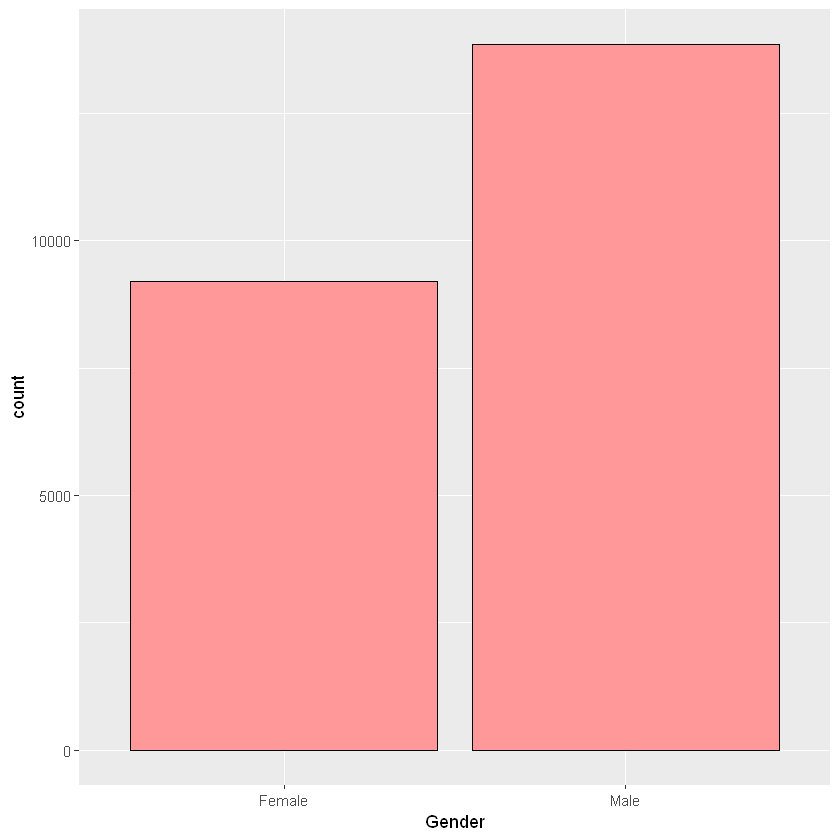

In [344]:
# Distribuição por gênero
ggplot(dados_rh) + geom_bar( aes(x = Gender), fill="#FF9999", colour="black") 


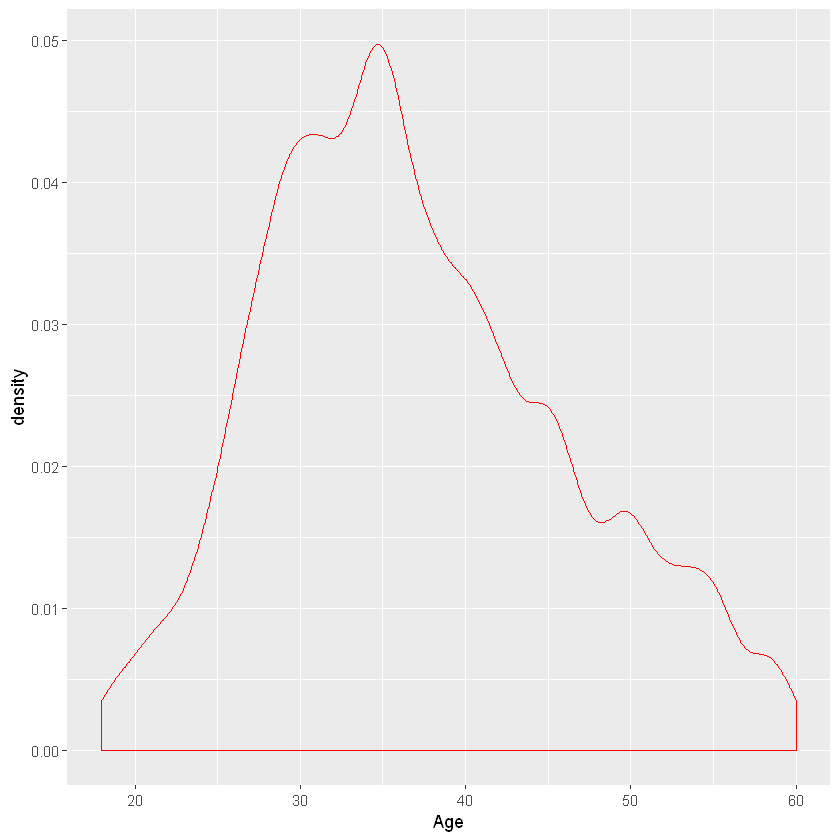

In [345]:
# Distribuição por Idade
ggplot(dados_rh) + geom_density(aes(x = Age), ,colour="red") 


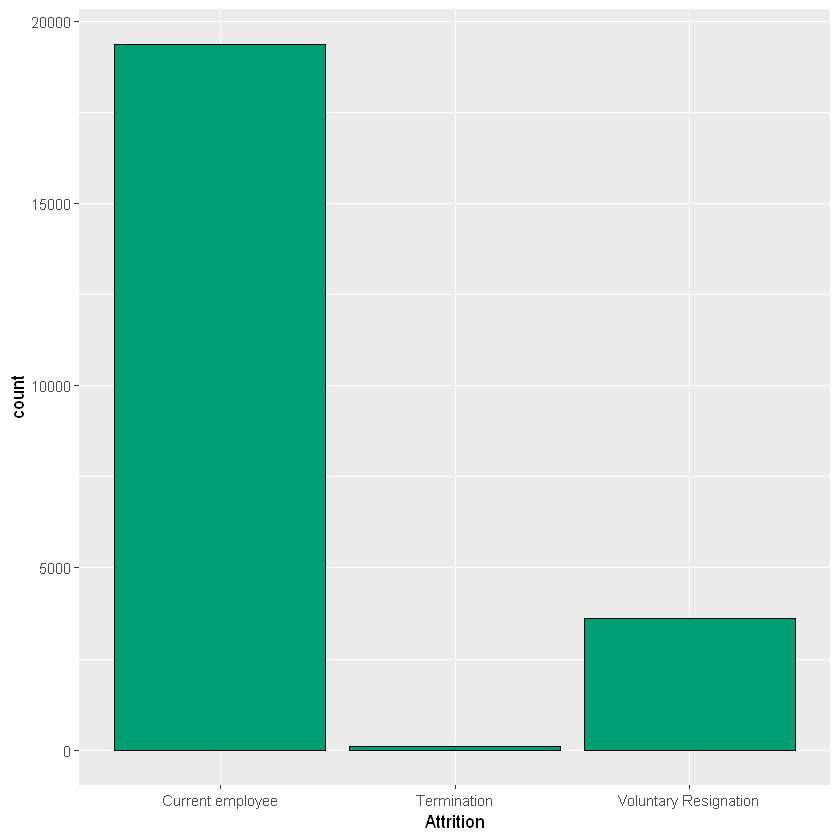

In [346]:
# Distribuição por turnover dos funcionários
ggplot(dados_rh) + geom_bar(aes(x = Attrition), fill="#009E73", colour="black")

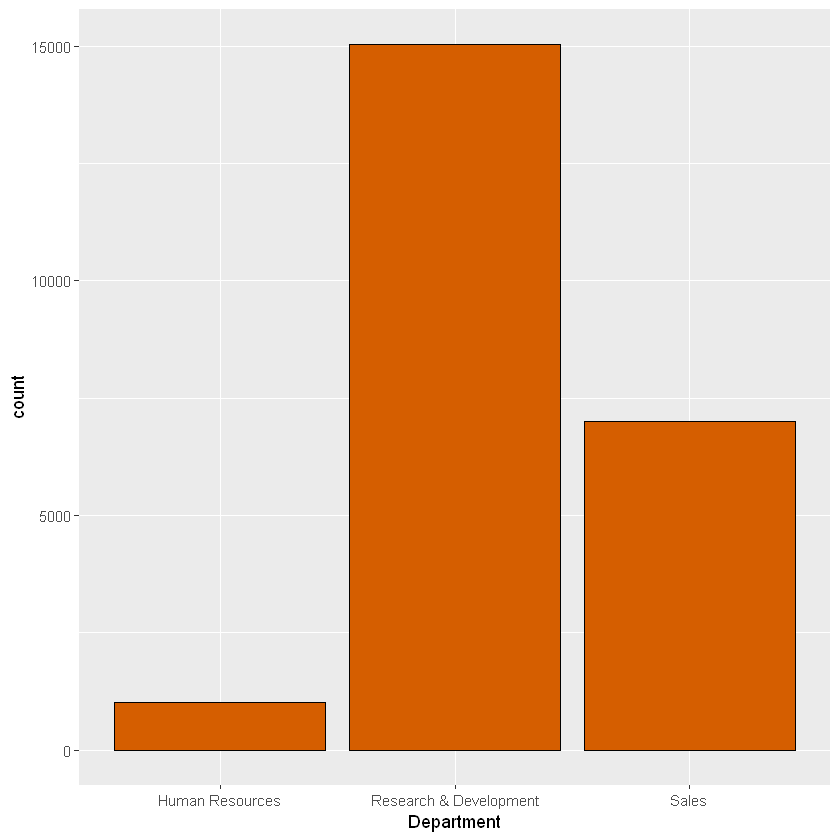

In [347]:
# Distribuição por departamento
ggplot(dados_rh) + geom_bar(aes(x = Department), fill="#D55E00", colour="black")

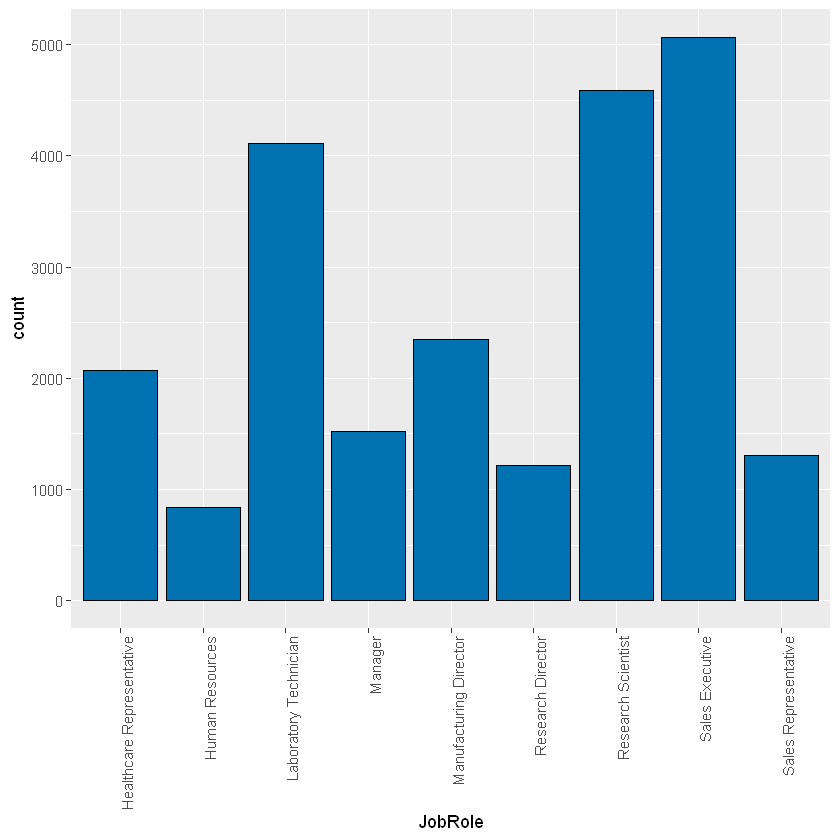

In [348]:
# Distribuição por função
ggplot(dados_rh) + theme(axis.text.x=element_text(angle=90,hjust=1)) + geom_bar(aes(x = JobRole), fill="#0072B2", colour="black")

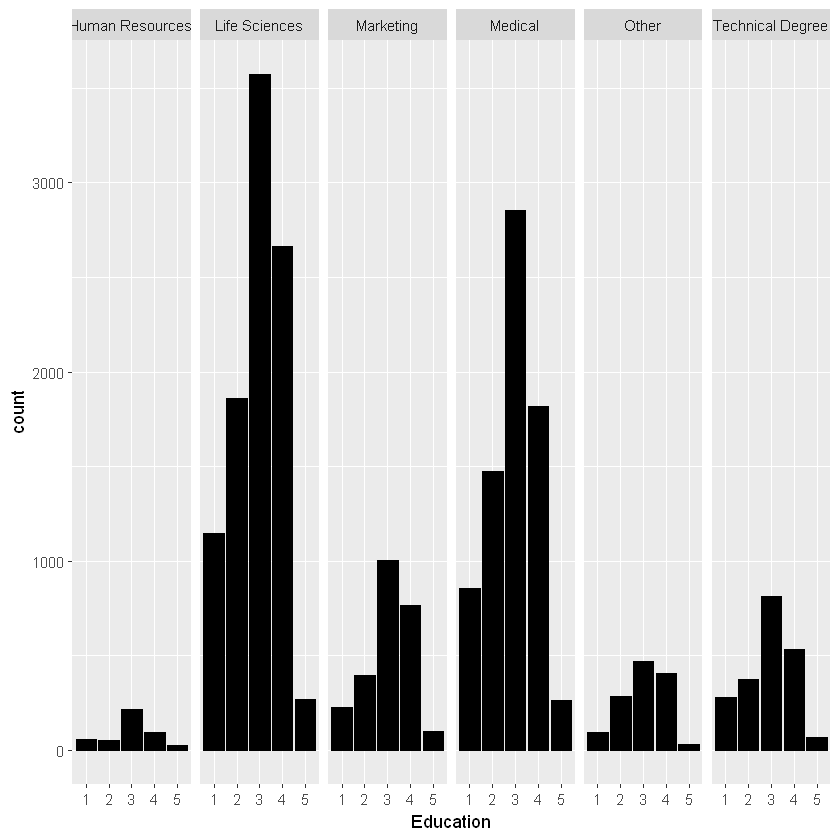

In [349]:
# Distribuição por função
ggplot(dados_rh) +  geom_bar(aes(x = Education), fill="#000000", colour="black") + facet_grid(~EducationField)

In [350]:
# Plotando gráficos de densidade para analisar as respectivas variações 
p.TotalWorkingYears       = ggplot(dados_rh) + geom_density(aes(TotalWorkingYears), colour="blue")
p.YearsAtCompany          = ggplot(dados_rh) + geom_density(aes(YearsAtCompany),colour="blue")
p.YearsSinceLastPromotion = ggplot(dados_rh) + geom_density(aes(YearsSinceLastPromotion),colour="blue")
p.YearsWithCurrManager    = ggplot(dados_rh) + geom_density(aes(YearsWithCurrManager),colour="blue")
p.YearsInCurrentRole      = ggplot(dados_rh) + geom_density(aes(YearsInCurrentRole),colour="blue")
p.PriorYearsOfExperience  = ggplot(dados_rh) + geom_density(aes(PriorYearsOfExperience),colour="blue")

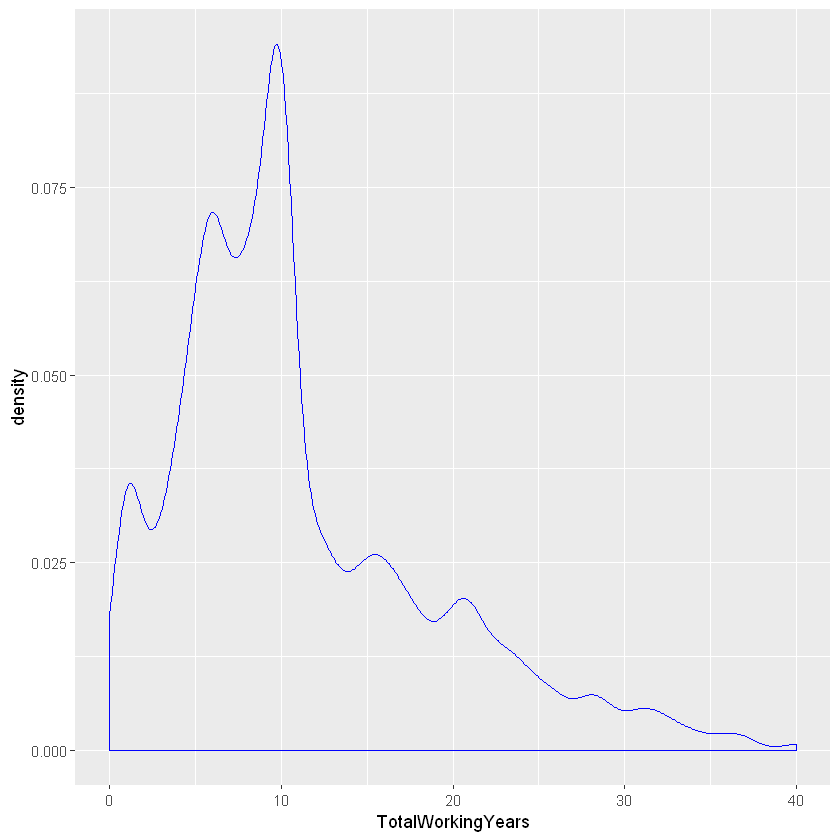

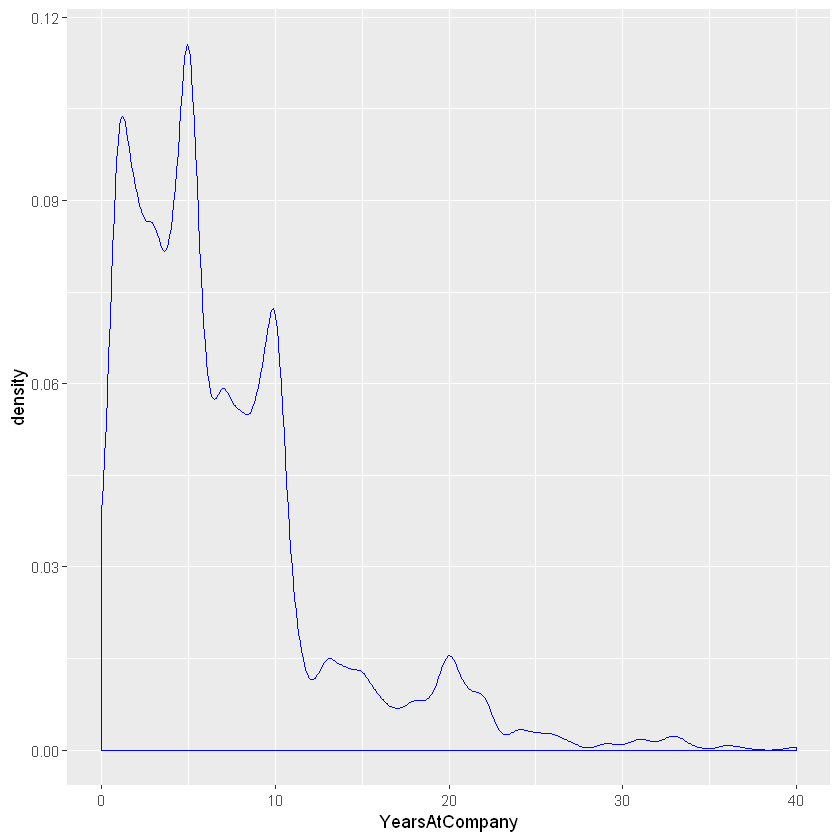

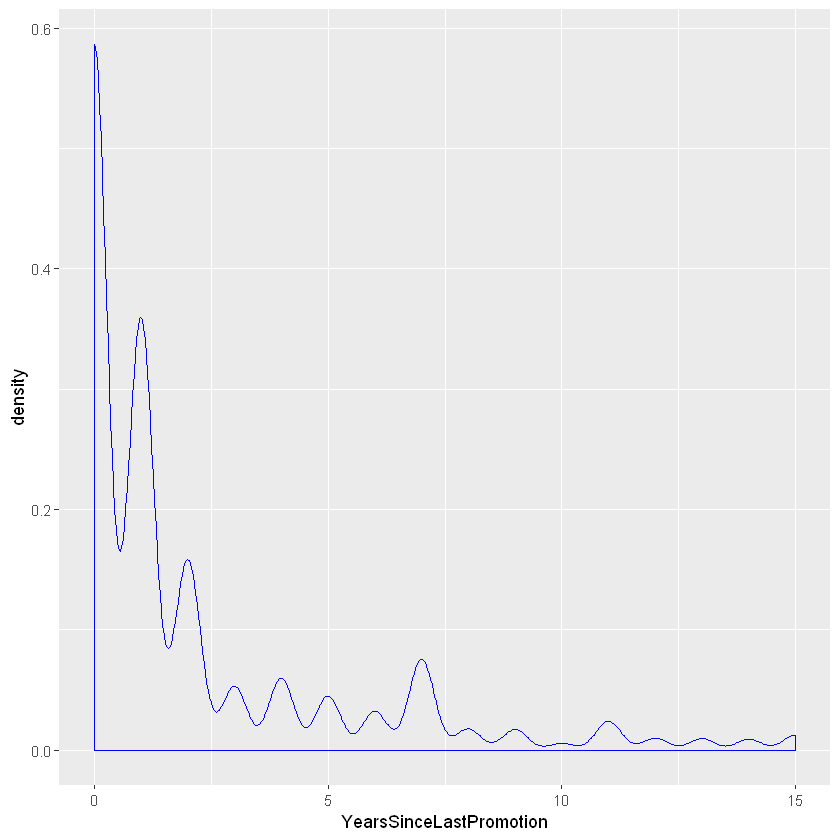

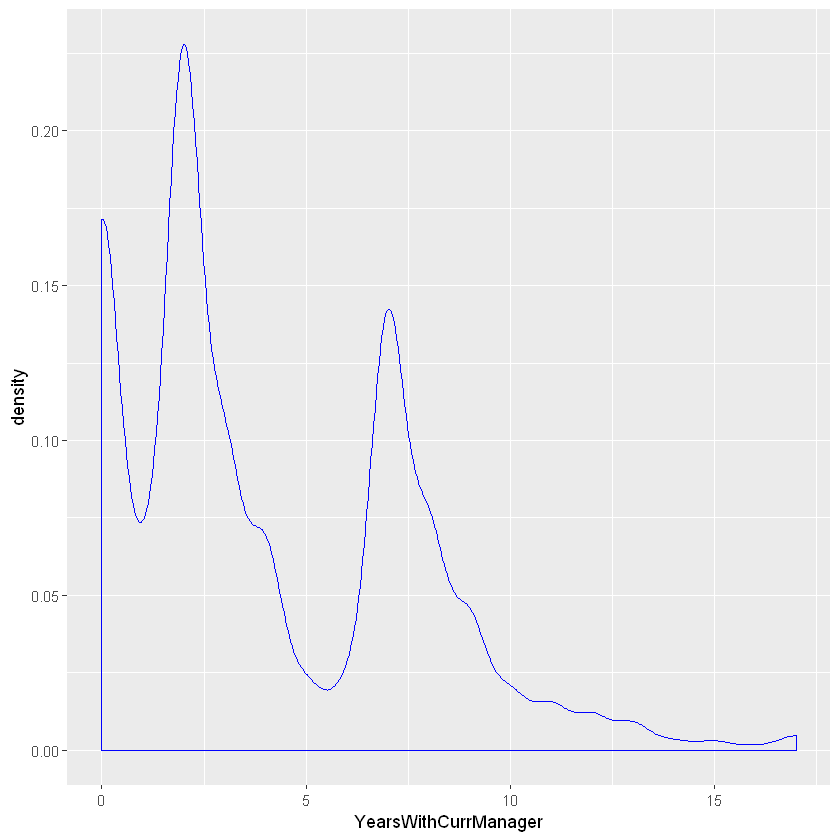

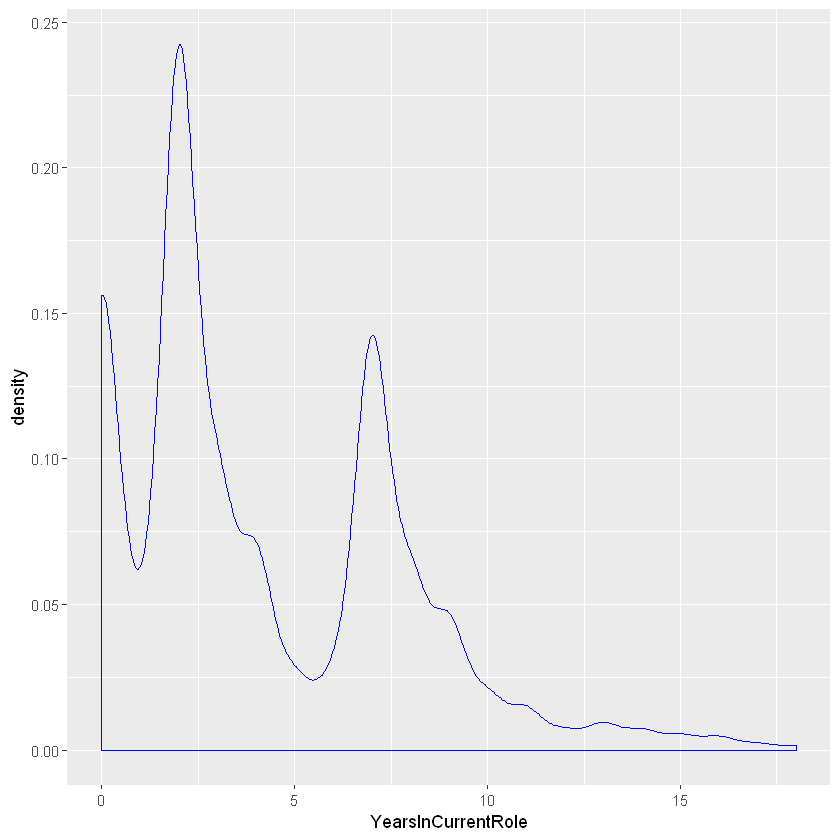

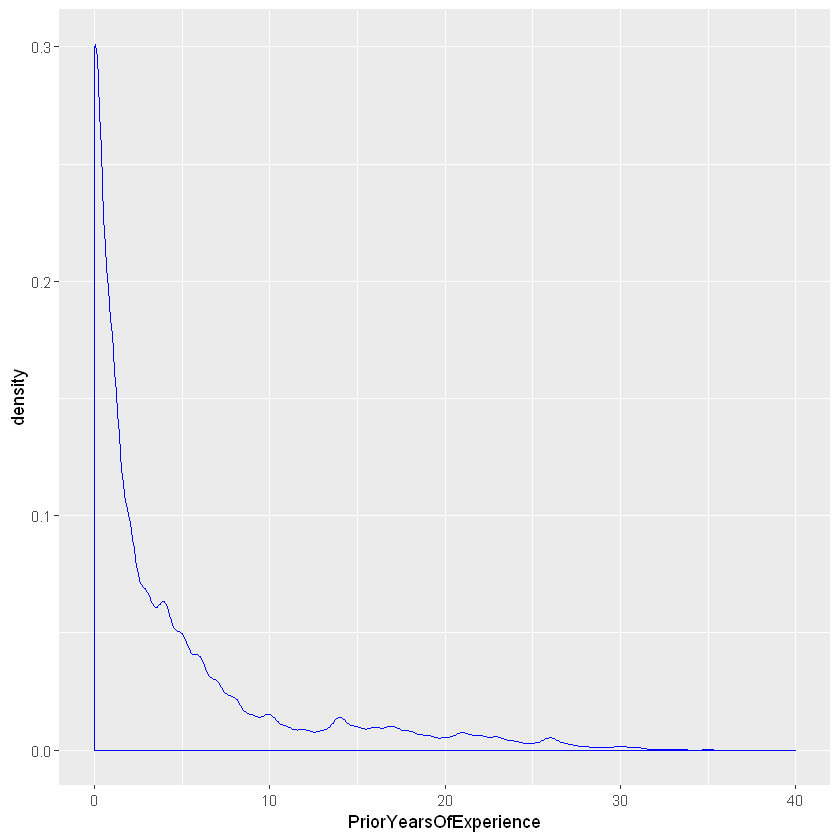

In [351]:
p.TotalWorkingYears
p.YearsAtCompany
p.YearsSinceLastPromotion
p.YearsWithCurrManager
p.YearsInCurrentRole
p.PriorYearsOfExperience

In [352]:
# Analisando a proporção de funcionários por tempo de experiência trabalharos anteriores
# (valores escolhidos: 1, 3, 5, 7, 10 anos)
length(which(dados_rh$PriorYearsOfExperience < 1)) / length(dados_rh$PriorYearsOfExperience)  
length(which(dados_rh$PriorYearsOfExperience < 3)) / length(dados_rh$PriorYearsOfExperience)   
length(which(dados_rh$PriorYearsOfExperience < 5)) / length(dados_rh$PriorYearsOfExperience)   
length(which(dados_rh$PriorYearsOfExperience < 7)) / length(dados_rh$PriorYearsOfExperience)   
length(which(dados_rh$PriorYearsOfExperience < 10)) / length(dados_rh$PriorYearsOfExperience)  

[1] 0.3246596

[1] 0.5828346

[1] 0.7085177

[1] 0.7952121

[1] 0.8589644

<h3> 58% dos funcionários têm menos de 3 anos de experiência de trabalho antes de entrarem na IBM.<br/><br/>
 Possíveis problemas: Percepção de estagnação na carreira, desmotivação, habilidades pouco desenvolvidas e ofertas de trabalho mais atrativa conforme aumento na senioridade do cargo. </h3>

In [353]:
# Análise por idade com menos de 30 anos
length(which(dados_rh$Age < 30)) / length(dados_rh$Age)

[1] 0.2165409


<h3> Apenas 22% dos funcionários têm menos de 30 anos, a base de funcionários não é exatamente 
 tão jovem como o esperado. </h3>

In [354]:
# # Educação
summary(dados_rh$Education)
length(which(dados_rh$Education == 3)) / length(dados_rh$Education)
length(which(dados_rh$Education == 4)) / length(dados_rh$Education)

1    2    3    4    5 
2659 4436 8930 6279  754

[1] 0.3872842

[1] 0.2723133

<h3> Cerca de 39% dos funcionários são graduados e 27% realizaram o mestrado. </h3>

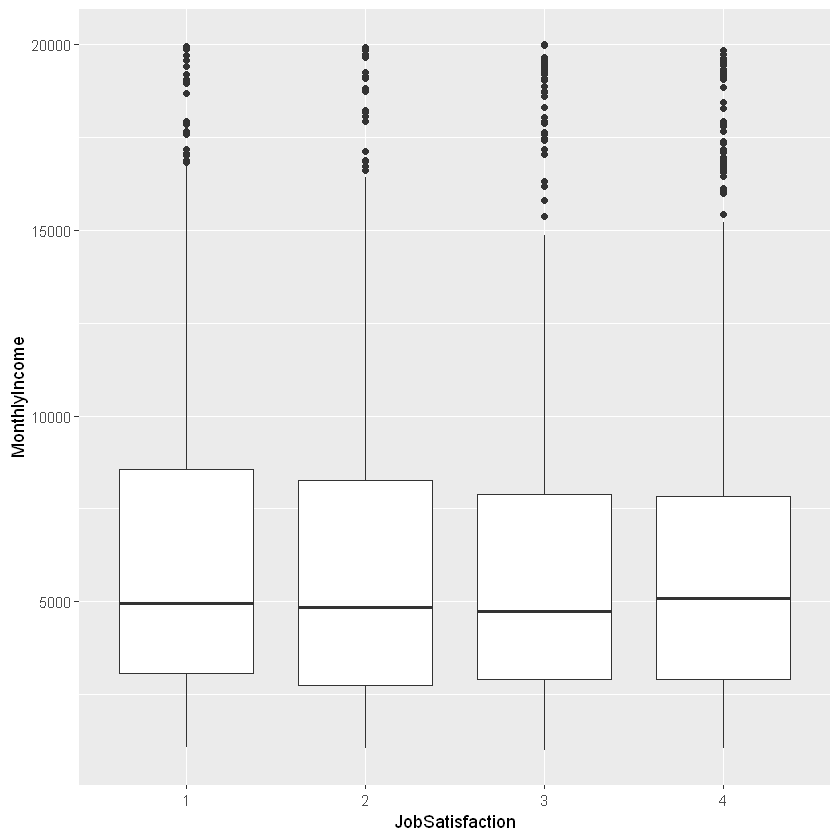

In [355]:
# Boxplot mostrando a distribuição do salário mensal para todos os 4 níveis 
# de satisfação no trabalho de 1-4
ggplot(data = subset(dados_rh, !is.na(JobSatisfaction)), aes(JobSatisfaction, MonthlyIncome)) + 
  geom_boxplot()

<h3> Não há relação direta de que um salário mais alto leva a uma maior satisfação no trabalho </h3>

In [356]:
# Correlação entre as variáveis
# Quanto mais próximo do valor 1, maior será a correlação entre as duas variáveis selacionadas.
cor(dados_rh$TotalWorkingYears, dados_rh$YearsAtCompany,          use = "complete.obs")
cor(dados_rh$YearsAtCompany,    dados_rh$YearsInCurrentRole,      use = "complete.obs")
cor(dados_rh$YearsAtCompany,    dados_rh$YearsSinceLastPromotion, use = "complete.obs")
cor(dados_rh$YearsAtCompany,    dados_rh$YearsWithCurrManager,    use = "complete.obs")
cor(dados_rh$TotalWorkingYears, dados_rh$MonthlyIncome,           use = "complete.obs")
cor(dados_rh$YearsAtCompany,    dados_rh$MonthlyIncome,           use = "complete.obs")

[1] 0.624816

[1] 0.7670497

[1] 0.6236737

[1] 0.7728072

[1] 0.7582066

[1] 0.4981578

<h3> As maiores correlações estão relacionadas a: <br/>
1 - Quanto mais tempo na empresa, maior tende a ser o salário <br/>
2 - Quanto mais tempo na empresa, maior o tempo com o gerente atual <br/>
3 - Quanto mais tempo na empresa, maior o tempo na função atual</h3>

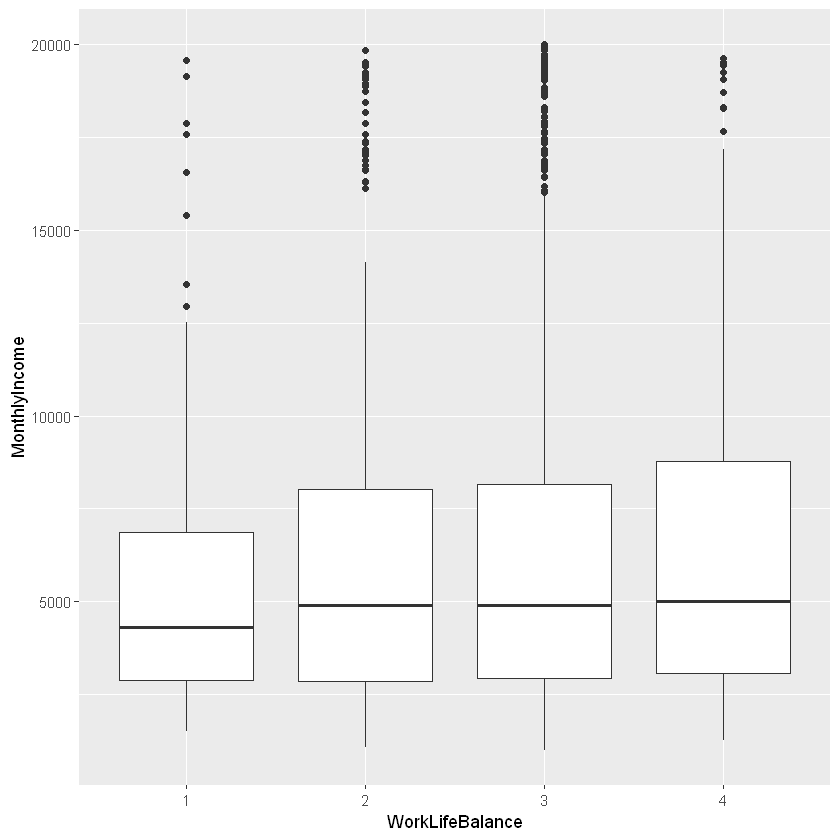

In [357]:
# Vamos investigar a relação do equilíbrio entre vida pessoal e profissional e renda mensal
ggplot(data = subset(dados_rh, !is.na(WorkLifeBalance)), aes(WorkLifeBalance, MonthlyIncome)) + 
  geom_boxplot()

<h3> Os funcionários que avaliaram o equilíbrio entre vida profissional e pessoal igual a 1 também têm renda média mensal 
 significativamente mais baixa. <br/><br/>
 Baixo equilíbrio entre vida profissional e baixo salário? Um problema que o departamento de RH precisa examinar. </h3>


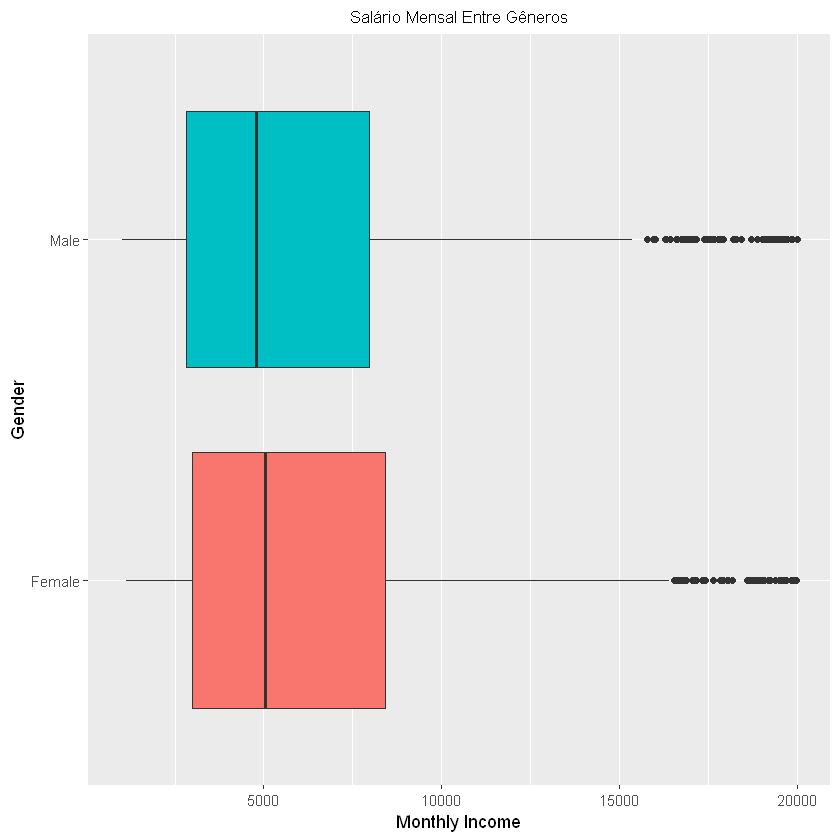

In [358]:
# Verificando a diferença salarial entre homens e mulheres.
ggplot(data = subset(dados_rh, !is.na(Gender)), aes(Gender, MonthlyIncome, fill = Gender)) +
  geom_boxplot() + 
  theme(legend.position = "none", plot.title = element_text(hjust = 0.5, size = 10)) +
  labs(x = "Gender", y = "Monthly Income", title = "Salário Mensal Entre Gêneros") +
  coord_flip()

<h3>  Não há sinais de discriminação de gênero; na verdade, as mulheres ganham um pouco mais, em média, </h3>

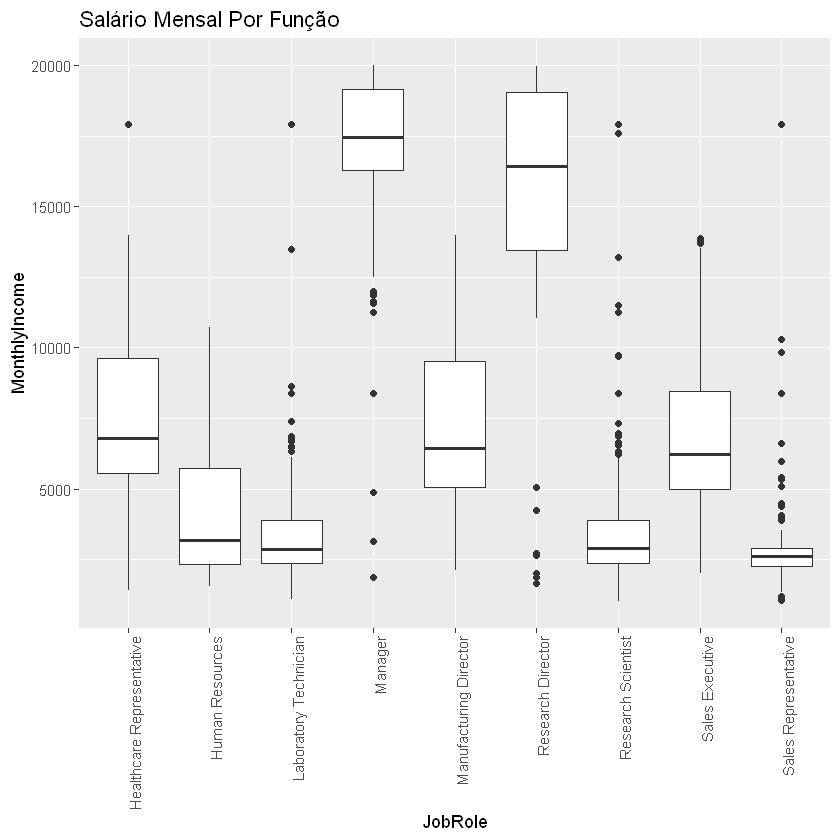

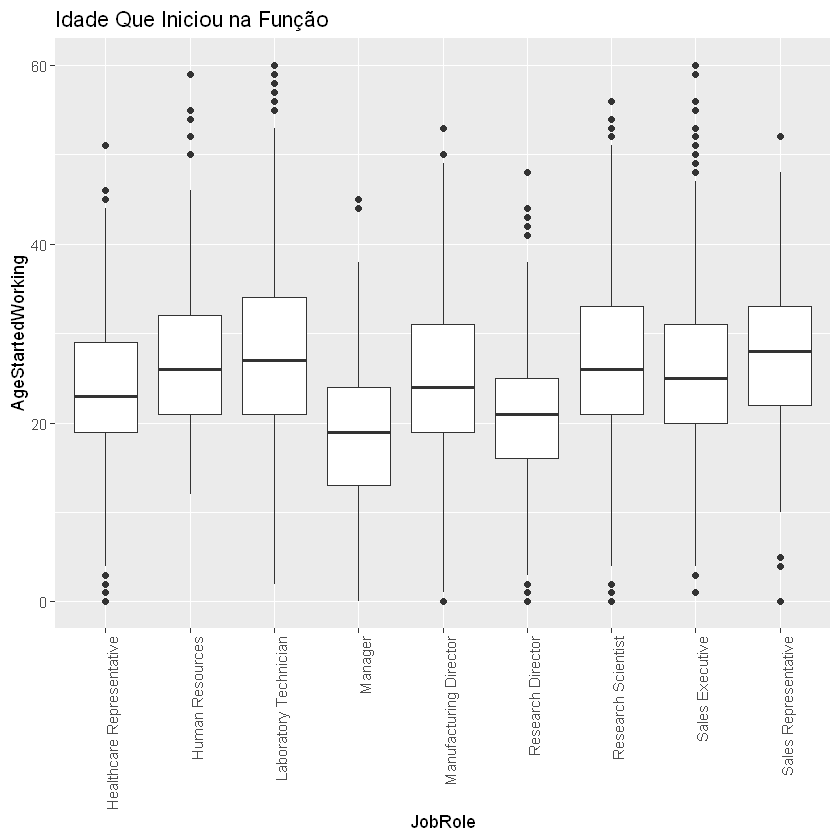

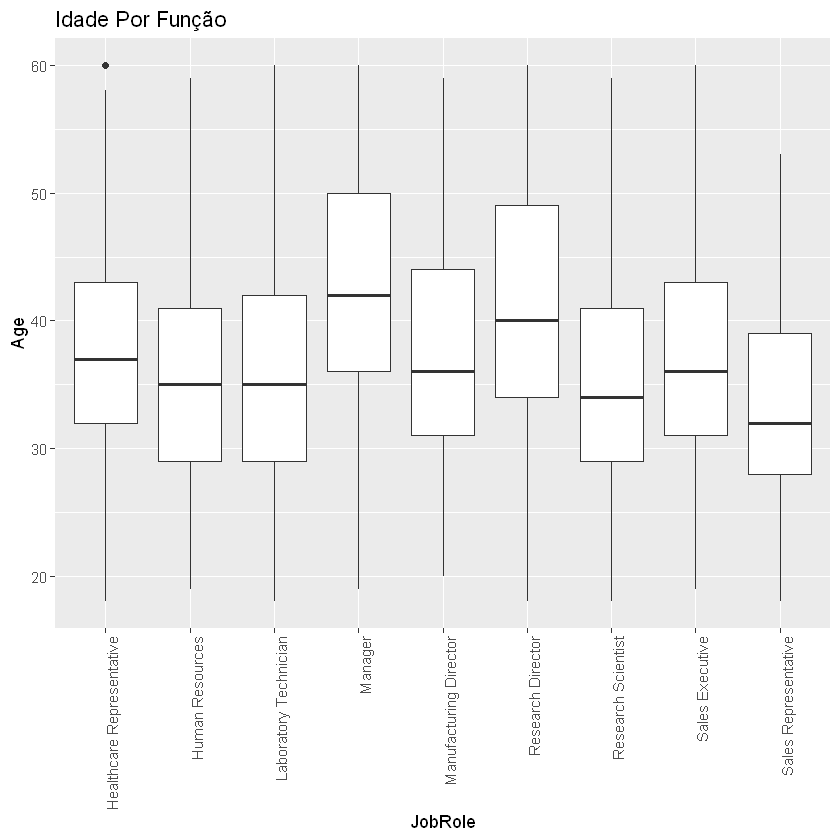

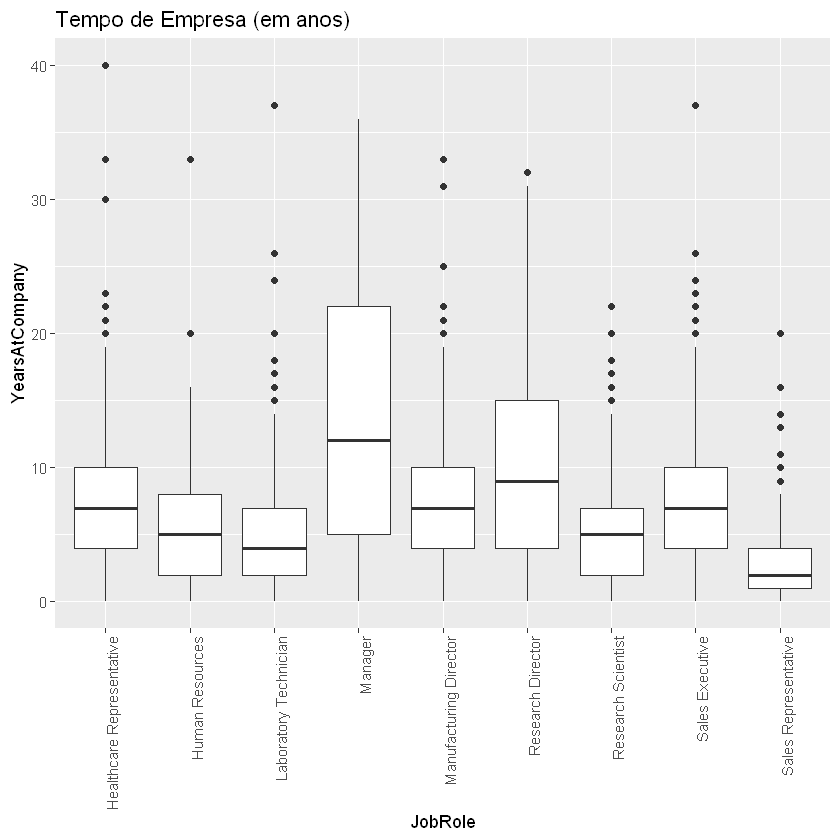

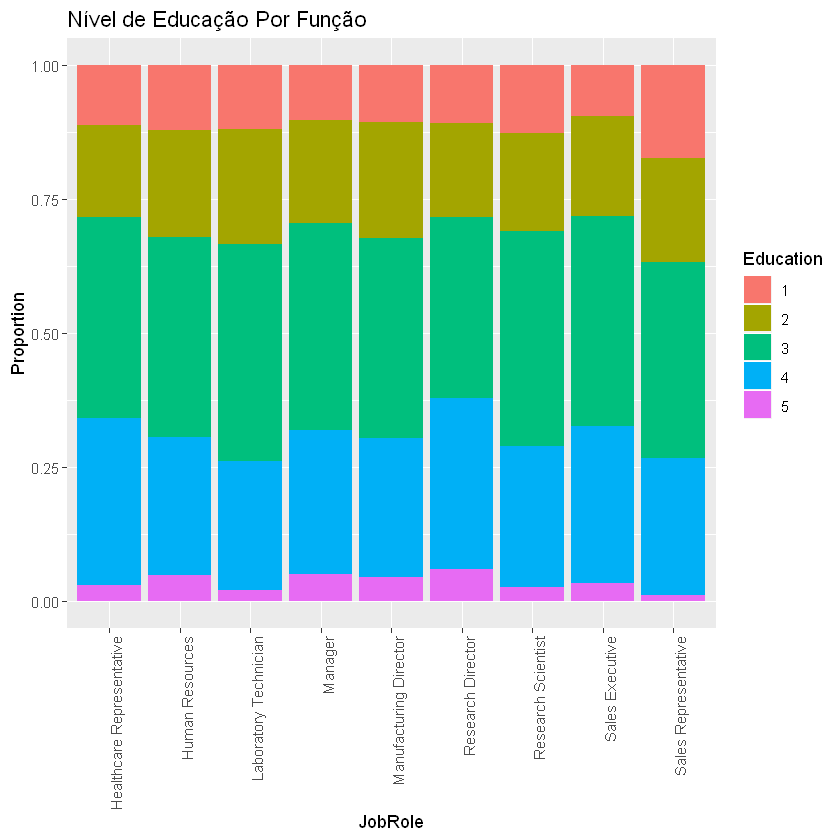

In [359]:
# Distribuições de algumas variáveis por cargo
ggplot(data = subset(dados_rh, !is.na(JobRole))) +   theme(axis.text.x=element_text(angle=90,hjust=1)) + geom_boxplot(aes(JobRole, MonthlyIncome)) +
  ggtitle("Salário Mensal Por Função")

ggplot(data = subset(dados_rh, !is.na(JobRole))) +   theme(axis.text.x=element_text(angle=90,hjust=1)) + geom_boxplot(aes(JobRole, AgeStartedWorking)) +
  ggtitle("Idade Que Iniciou na Função")

ggplot(data = subset(dados_rh, !is.na(JobRole))) +   theme(axis.text.x=element_text(angle=90,hjust=1)) + geom_boxplot(aes(JobRole, Age)) +
  ggtitle("Idade Por Função")

ggplot(data = subset(dados_rh, !is.na(JobRole))) +   theme(axis.text.x=element_text(angle=90,hjust=1)) + geom_boxplot(aes(JobRole, YearsAtCompany)) +
  ggtitle("Tempo de Empresa (em anos)")

ggplot(data = na.omit(dados_rh)) +   theme(axis.text.x=element_text(angle=90,hjust=1)) + geom_bar(aes(JobRole, fill = Education), position = "fill") +
  ggtitle("Nível de Educação Por Função") + 
  ylab("Proportion")


In [391]:
library(gridExtra)
warning=FALSE

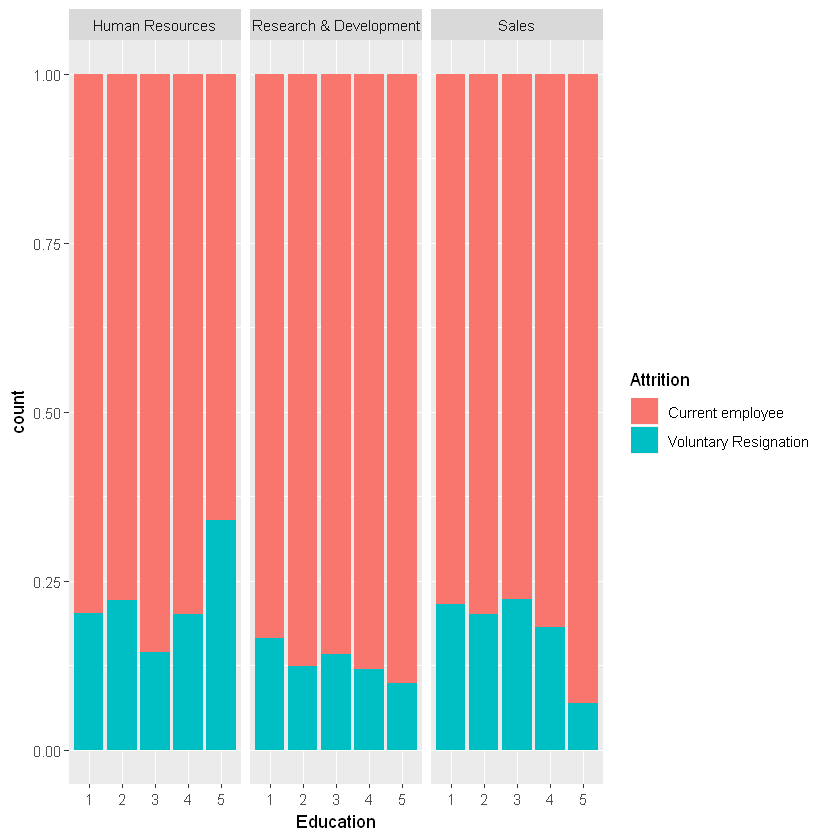

In [361]:
# Plots de análise multivariada para variáveis normalmente usadas durante o processo de contratação
ggplot(data = dados_rh_1) + 
  geom_bar(aes(x = Education , fill = Attrition), position = 'fill') + 
  facet_grid(.~Department)

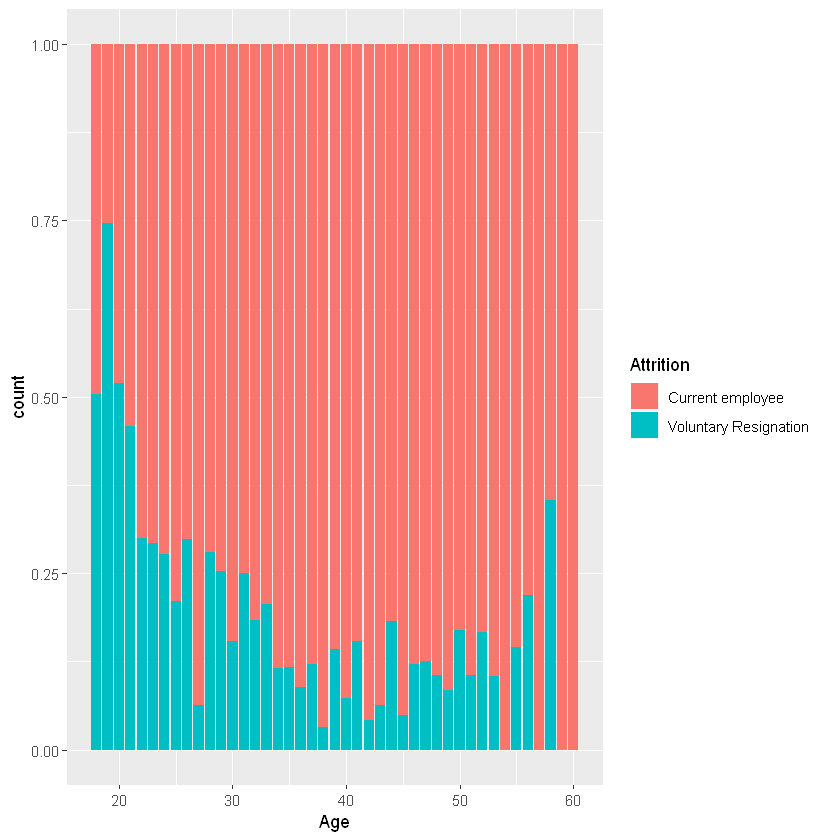

In [362]:
# Plots de análise multivariada para variáveis normalmente usadas após o processo de contratação
ggplot(dados_rh_1) + geom_bar(aes(x = Age, fill = Attrition), position = 'fill')

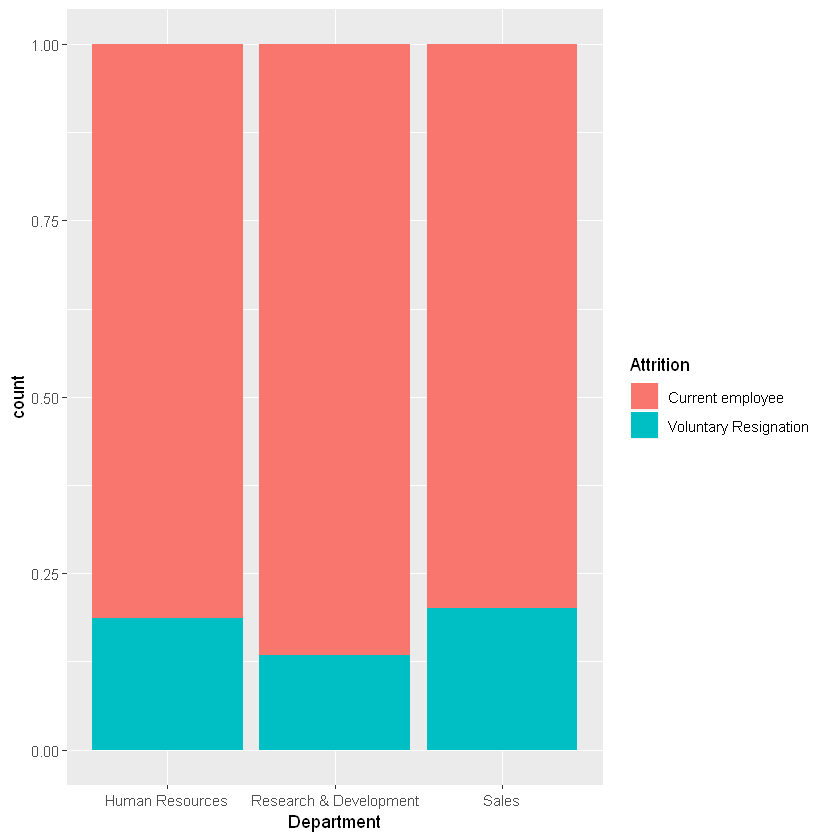

In [363]:
ggplot(dados_rh_1) + geom_bar(aes(x = Department, fill = Attrition), position = 'fill') 


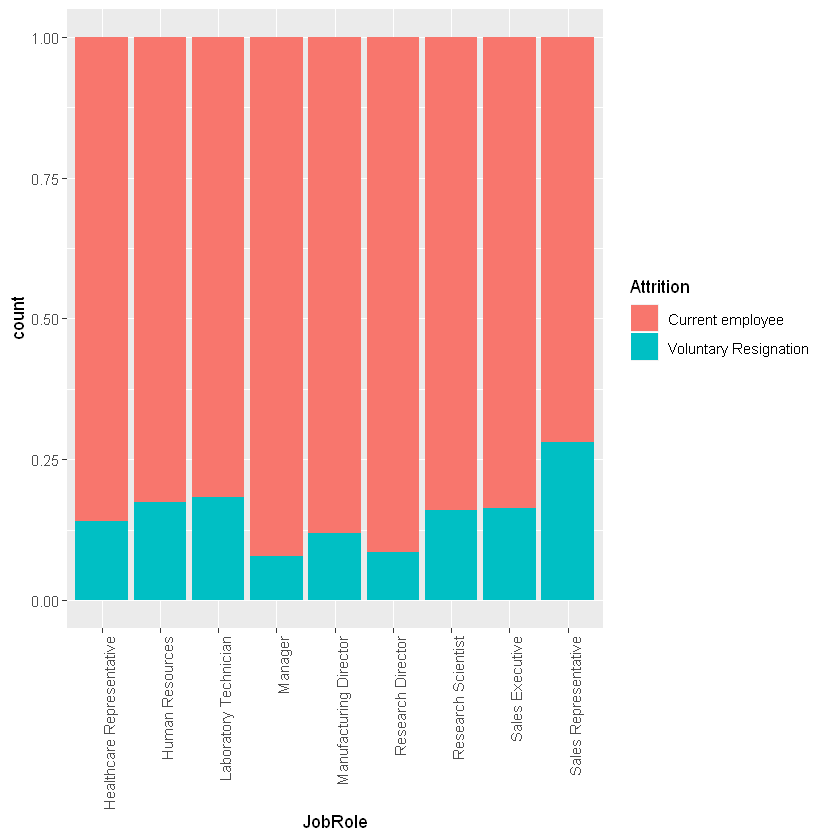

In [364]:
ggplot(dados_rh_1) + theme(axis.text.x=element_text(angle=90,hjust=1)) + geom_bar(aes(x = JobRole, fill = Attrition), position = 'fill')

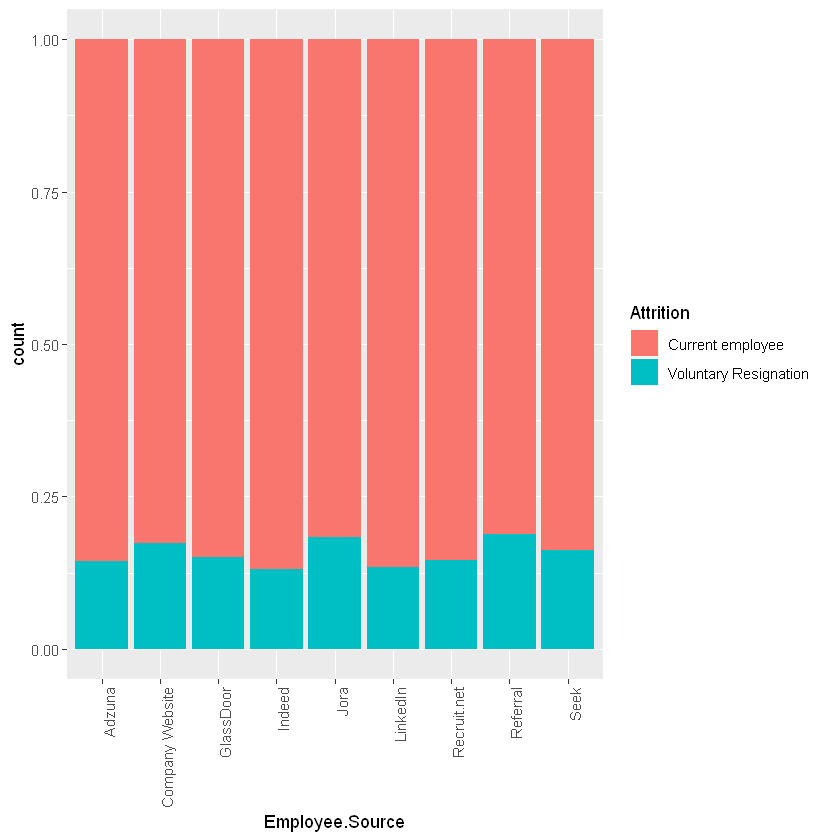

In [365]:
ggplot(dados_rh_1) + theme(axis.text.x=element_text(angle=90,hjust=1)) + geom_bar(aes(x = Employee.Source, fill = Attrition), position = 'fill')

<h2> Criando o modelo de predição (Machine Learning) </h2> <br/>

<h3> O objetivo do modelo será auxiliar a área de RH a recrutar novos funcionários buscando reduzir ao máximo o indíce de turnover, ou seja, evitar desligamentos que atrapalhem a performance da empresa. </h3>

<h3> Neste primeiro modelo, será utilizado o algoritmo de regressão logística para prever a variável target (Attrition). <br/>

Serão utilizadas as seguintes variáveis preditoras:<br/>
- Idade<br/>
- Departamento<br/>
- Distancia de casa <br/>
- Área de emprego <br/>
- Função no trabalho <br/>
- Permanência média em empresas anteriores <br/>
- Anos de experiência profissional <br/>
- Education <br/>
- Área de formação <br/></h3>

In [366]:
# Criando o modelo
modelo_v1 = glm(Attrition ~ Age + Department + DistanceFromHome + Employee.Source + 
                   JobRole + AverageTenure + PriorYearsOfExperience +  
                   Education + EducationField, 
                 family = binomial, 
                 data = dados_rh)

In [367]:
# Resumo do modelo
# Quanto maior a quantidade de asterícos na variável  Pr, maior a importância dela para a predição da variável target
summary(modelo_v1)


Call:
glm(formula = Attrition ~ Age + Department + DistanceFromHome + 
    Employee.Source + JobRole + AverageTenure + PriorYearsOfExperience + 
    Education + EducationField, family = binomial, data = dados_rh)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3096  -0.6286  -0.5157  -0.3743   2.6659  

Coefficients:
                                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)                      -0.118596   0.191837  -0.618  0.53644    
Age                              -0.047146   0.002433 -19.378  < 2e-16 ***
DepartmentResearch & Development -0.439369   0.102517  -4.286 1.82e-05 ***
DepartmentSales                   0.016297   0.106013   0.154  0.87783    
DistanceFromHome                  0.021380   0.002484   8.608  < 2e-16 ***
Employee.SourceCompany Website    0.194703   0.074104   2.627  0.00860 ** 
Employee.SourceGlassDoor          0.023165   0.089088   0.260  0.79485    
Employee.SourceIndeed            -0.066399   0.088284  -0

<h2> Aprimorando o modelo </h2> 

<h3> Vamos dividir os dados em treino e em teste na proporção de 70%:30% para aperfeiçoar o modelo  </h3>
   <h3> Além disto, será retirado do dataset as pessoas que foram demitidos com o objetivo de melhorar a análise</h3>

In [368]:
# Filtrando os dados de pessoas demitidas previamente
dados_rh_1 = dados_rh[dados_rh$Attrition != 'Termination', ]

In [369]:
# Divisão em dados de treino e de teste
library(caTools)
dados_treino = sample.split(Y = dados_rh_1$Attrition, SplitRatio = 0.7)

In [370]:
# Dataset de treino
dados_rh_1_treino = subset(dados_rh_1, train = T)

In [371]:
# Dataset de teste
dados_rh_1_teste = subset(dados_rh_1, train = F)

In [372]:
# Segunda versão do modelo
modelo_v2 = glm(Attrition ~ Age + Department + DistanceFromHome + Employee.Source + 
                   JobRole + AverageTenure + PriorYearsOfExperience +  
                   Education + EducationField, 
                 family = binomial, 
                 data = dados_rh_1_treino)

In [373]:
# Verificando as variáveis mais importantes para o modelo
library(car)
vif(modelo_v2)

,GVIF,Df,GVIF^(1/(2*Df))
Age,1.189992,1,1.090867
Department,2.053409,2,1.197068
DistanceFromHome,1.324851,1,1.151022
Employee.Source,1.088061,8,1.005289
JobRole,2.482715,8,1.058481
AverageTenure,2.451575,1,1.565750
PriorYearsOfExperience,2.413463,1,1.553532
Education,1.116102,4,1.013825
EducationField,1.661830,5,1.052104


<h3> As variáveis mais importantes em ordem decrescente são:<br/><br/>
    - Função no trabalho <br/>
    - Permanência média em empresas anteriores <br/>
    - Anos antreiores de experiência <br/>
    - Departamento <br/> </h3>

In [374]:
# Realizando as previsões com os dados de teste
threshold = 0.5
previsoes_v2 = predict(modelo_v2, type = 'response', newdata = dados_rh_1_teste)

In [375]:
# Convertendo as probabilidades para a classificação da variável
# Caso a probabilidade seja > que 0.5, o empregado foi desligado voluntariamente, 
# caso seja < 0.5, o funcionário ainda é um empregado da empresa

previsoes_finais_v2 <- ifelse(previsoes_v2 > threshold, 'Voluntary Resignation', 'Current employee')
acuracia_modelo = table(dados_rh_1_teste$Attrition, previsoes_finais_v2)
acuracia_modelo

                       previsoes_finais_v2
                        Current employee Voluntary Resignation
  Current employee                 19356                    14
  Termination                          0                     0
  Voluntary Resignation             3585                    16

In [376]:
taxaacerto = (acuracia_modelo[1] + acuracia_modelo[6]) / sum(acuracia_modelo)
taxaacerto

[1] 0.8433242

<h3> Neste modelo a acurácia (precisão dos acertos) foi de 84,33% 
</h3>

<h2> Com o intuito de melhorar a performance do modelo, iremos permanecer apenas com as variáveis mais importantes para o modelo, conforme visto na tabela VIF.
</h2>

In [377]:
# Criando o terceiro modelo a partir da seleção de atributos
modelo_v3 = glm(Attrition ~ Age + Department + DistanceFromHome + JobRole + 
                     AverageTenure + PriorYearsOfExperience, 
                 family = binomial, 
                 data = dados_rh_1_treino)

In [378]:
# Realizando as previsões com os dados de teste
threshold = 0.5
previsoes_v3 = predict(modelo_v3, type = 'response', newdata = dados_rh_1_teste)

In [379]:
# Convertendo as probabilidades para a classificação da variável
previsoes_finais_v3 <- ifelse(previsoes_v3 > threshold, 'Voluntary Resignation', 'Current employee')
acuracia_modelo3 = table(dados_rh_1_teste$Attrition, previsoes_finais_v3)
acuracia_modelo3

                       previsoes_finais_v3
                        Current employee Voluntary Resignation
  Current employee                 19358                    12
  Termination                          0                     0
  Voluntary Resignation             3584                    17

In [380]:
# Taxa de acerto (acurácia) do terceiro modelo
taxaacerto = (acuracia_modelo3[1] + acuracia_modelo3[6]) / sum(acuracia_modelo3)
taxaacerto

[1] 0.8434548

<h3> Com as seleções de atributos (variáveis preditorias), houve um ganho na performance de apenas 0,01%.<br/> <br/>
    Indicando que a performance do modelo é limitada em média por esse valor (Aproximadamente 84,3%)
    <br/><br/> O modelo apresenta uma taxa de acerto relevante (84,3%), o que significa que irá acertar em média 84 previsões a cada 100 funcionários novos que testarmos. 
    <br/><br/>Importante salientar um modelo que aproxime-se de 100%  torna-se um modelo enviesado, desta forma o resultado obtido está satisfatório.
</h3>